In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 3.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import emoji
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from keras.models import save_model

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/Projects/Emoji_Sentiment_Analysis/Dataset/tweet_eng.csv"
df = pd.read_csv(file_path)

In [ ]:
# Display the entire DataFrame
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)

      sentiment                                               post
0             1             An inspiration in all aspects: Fashion
1             1                                            fitness
2             1         beauty and personality. 😊 😘 TheFashionIcon
3             1  Apka Apna Awam Ka Channel Frankline Tv Aam Adm...
4             1  Beautiful album from the greatest unsung guita...
5             1  Good luck to Rich riding for great project in ...
6             1                 Omg he... kissed... him 😆 with joy
7             1                   😊 anniv ming and papi!!!!! 😍 😍 😊
8             1                                           thanks 😊
9             1                                       C'mon Tweeps
10            1    Join vote for the singer! Do spread the word. 😄
11            1                     Thanks for the great review! 😭
12            1  Yay another art raffle! Everything you need to...
13            1  Hello I hope you visit Luxor its amazing city

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  2000 non-null   int64 
 1   post       2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB
None


In [ ]:
df.shape

(2000, 2)

In [ ]:
# Load the emoji dataset
emoji_file_path = "/content/drive/MyDrive/Projects/Emoji_Sentiment_Analysis/Dataset/emoji_dataset.csv"
emoji_df = pd.read_csv(emoji_file_path)

In [ ]:
emoji_df.head(20)

,emoji,name,group,sub_group,codepoints
0,😀,grinning face,Smileys & Emotion,face-smiling,1F600
1,😃,grinning face with big eyes,Smileys & Emotion,face-smiling,1F603
2,😄,grinning face with smiling eyes,Smileys & Emotion,face-smiling,1F604
3,😁,beaming face with smiling eyes,Smileys & Emotion,face-smiling,1F601
4,😆,grinning squinting face,Smileys & Emotion,face-smiling,1F606
5,😅,grinning face with sweat,Smileys & Emotion,face-smiling,1F605
6,🤣,rolling on the floor laughing,Smileys & Emotion,face-smiling,1F923
7,😂,face with tears of joy,Smileys & Emotion,face-smiling,1F602
8,🙂,slightly smiling face,Smileys & Emotion,face-smiling,1F642
9,🙃,upside-down face,Smileys & Emotion,face-smiling,1F643


In [ ]:
missing_values = df.isna().sum()
print(missing_values)

sentiment    0
post         0
dtype: int64


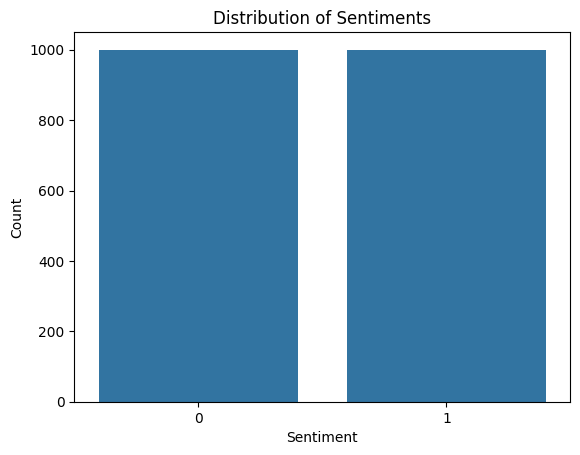

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot
sns.countplot(data=df, x='sentiment')

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Show the plot
plt.show()

In [ ]:
# Count of positive sentiment
count_positive = df[df['sentiment'] == 1].shape[0]
print(f'Count of positive sentiment: {count_positive}')

# Count of negative sentiment
count_negative = df[df['sentiment'] == 0].shape[0]
print(f'Count of negative sentiment: {count_negative}')

Count of positive sentiment: 1000
Count of negative sentiment: 1000


In [ ]:
# Function to retrieve emojis from a list of words
retrieve_emojis = lambda word_list: [match["emoji"] for word in word_list for match in emoji.emoji_list(word)]

# Function to extract text and emojis from a given text
def extract_text_and_emoji(text):
    # Remove tags, links, and unnecessary characters
    remove_keys = ('@', 'http://', '&', '#')
    clean_text = ' '.join(txt for txt in text.split() if not txt.startswith(remove_keys))

    # Retrieve all characters and emojis
    allchars = [char for char in text]
    emoji_list = retrieve_emojis(text)

    # Extract text (without emojis) and emojis
    clean_text = ' '.join([char for char in clean_text.split() if not any(i in char for i in emoji_list)])
    clean_emoji = ' '.join([char for char in text.split() if any(i in char for i in emoji_list)])

    return clean_text, clean_emoji

# Initialize lists to store text and emoji separately
temp_df_text = []
temp_df_emoji = []

# Iterate over each text in the 'post' column of the DataFrame df
for text in df['post']:
    # Extract text and emoji using the defined function
    extracted_text, extracted_emoji = extract_text_and_emoji(text)

    # Append extracted text and emoji to respective lists
    temp_df_text.append(extracted_text)
    temp_df_emoji.append(extracted_emoji)

# Assign the extracted text and emoji to new columns in the DataFrame df
df['post_text'] = temp_df_text
df['emoji'] = temp_df_emoji

In [ ]:
df.head(10)

,sentiment,post,post_text,emoji
0,1,An inspiration in all aspects: Fashion,An inspiration in all aspects: Fashion,
1,1,fitness,fitness,
2,1,beauty and personality. 😊 😘 TheFashionIcon,beauty and personality. TheFashionIcon,😊 😘
3,1,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,😊
4,1,Beautiful album from the greatest unsung guita...,Beautiful album from the greatest unsung guita...,
5,1,Good luck to Rich riding for great project in ...,Good luck to Rich riding for great project in ...,
6,1,Omg he... kissed... him 😆 with joy,Omg he... kissed... him with joy,😆
7,1,😊 anniv ming and papi!!!!! 😍 😍 😊,anniv ming and papi!!!!!,😊 😍 😍 😊
8,1,thanks 😊,thanks,😊
9,1,C'mon Tweeps,C'mon Tweeps,


In [ ]:
# Function to convert emoji to text
def convert_emoji_to_text(emo):
    if len(emo) > 0:
        return emoji.demojize(emo)
    return ""

# Apply the conversion function to the 'emoji' column and store the result in a new column 'emoji_text'
df["emoji_text"] = df["emoji"].apply(convert_emoji_to_text)


df.head(10)

,sentiment,post,post_text,emoji,emoji_text
0,1,An inspiration in all aspects: Fashion,An inspiration in all aspects: Fashion,,
1,1,fitness,fitness,,
2,1,beauty and personality. 😊 😘 TheFashionIcon,beauty and personality. TheFashionIcon,😊 😘,:smiling_face_with_smiling_eyes: :face_blowing...
3,1,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,😊,:smiling_face_with_smiling_eyes:
4,1,Beautiful album from the greatest unsung guita...,Beautiful album from the greatest unsung guita...,,
5,1,Good luck to Rich riding for great project in ...,Good luck to Rich riding for great project in ...,,
6,1,Omg he... kissed... him 😆 with joy,Omg he... kissed... him with joy,😆,:grinning_squinting_face:
7,1,😊 anniv ming and papi!!!!! 😍 😍 😊,anniv ming and papi!!!!!,😊 😍 😍 😊,:smiling_face_with_smiling_eyes: :smiling_face...
8,1,thanks 😊,thanks,😊,:smiling_face_with_smiling_eyes:
9,1,C'mon Tweeps,C'mon Tweeps,,


In [ ]:
# Regular expression pattern to match non-punctuation characters
NON_PUNCTUATION = r"[!\"#\$%&\(\)\*\+,-\./:;<=>\?@\[\\\]\^_`{\|}~0-9]"

# Function to remove punctuation from text
def remove_punctuation(text):
    no_punctuation_text = re.sub(NON_PUNCTUATION, " ", text)
    return no_punctuation_text

# Remove punctuation from the 'emoji_text' column and store the result in a new column 'clean_emoji_text'
df["clean_emoji_text"] = df["emoji_text"].apply(remove_punctuation)

# Function to remove HTML tags from text
def remove_html_tags(text):
    """Remove html tags from a string"""
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# Remove HTML tags from the 'post' column and store the result in a new column 'clean_post'
df["clean_post"] = df["post"].apply(remove_html_tags)

# Remove punctuation from the 'clean_post' column
df["clean_post"] = df["clean_post"].apply(remove_punctuation)

df.head()

,sentiment,post,post_text,emoji,emoji_text,clean_emoji_text,clean_post
0,1,An inspiration in all aspects: Fashion,An inspiration in all aspects: Fashion,,,,An inspiration in all aspects Fashion
1,1,fitness,fitness,,,,fitness
2,1,beauty and personality. 😊 😘 TheFashionIcon,beauty and personality. TheFashionIcon,😊 😘,:smiling_face_with_smiling_eyes: :face_blowing...,smiling face with smiling eyes face blowing...,beauty and personality 😊 😘 TheFashionIcon
3,1,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,😊,:smiling_face_with_smiling_eyes:,smiling face with smiling eyes,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...
4,1,Beautiful album from the greatest unsung guita...,Beautiful album from the greatest unsung guita...,,,,Beautiful album from the greatest unsung guita...


In [ ]:
abbreviations = {
    'lol': 'laugh out loud',
    'lmao': 'laughing my ass off',
    'rofl': 'rolling on the floor laughing',
    'omg': 'oh my god',
    'wtf': 'what the fuck',
    'fml': 'fuck my life',
    'smh': 'shaking my head',
    'btw': 'by the way',
    'imho': 'in my humble opinion',
    'idk': 'I do not know',
    'rn': 'right now',
    'ily': 'I love you',
    'tbh': 'to be honest',
    'ig': 'I guess',
    'bae': 'before anyone else',
    'yolo': 'you only live once',
    'fomo': 'fear of missing out',
    'tmi': 'too much information',
    'afk': 'away from keyboard',
    'afaik': 'as far as I know',
    'brb': 'be right back',
    'ftw': 'for the win',
    'hmu': 'hit me up',
    'idc': 'I do not care',
    'ikr': 'I know, right?',
    'jk': 'just kidding',
    'nbd': 'no big deal',
    'np': 'no problem',
    'omw': 'on my way',
    'ppl': 'people',
    'rt': 'retweet',
    'srsly': 'seriously',
    'tbt': 'throwback Thursday',
    'tg': 'thank god',
    'tgif': 'thank god it is Friday',
    'thx': 'thanks',
    'ttyl': 'talk to you later',
    'wyd': 'what you doing?',
    'yw': 'you are welcome',
    'gf': 'girlfriend',
    'bf': 'boyfriend',
    'bff': 'best friends forever',
    'wth': 'what the hell',
    'icymi': 'in case you missed it',
    'hth': 'hope this helps',
    'fwiw': 'for what it is worth',
    'imho': 'in my honest opinion',
    'fomo': 'fear of missing out',
    'imo': 'in my opinion',
    'jsyk': 'just so you know',
    'rn': 'right now',
    'omg': 'oh my god',
    'hmu': 'hit me up',
    'tbh': 'to be honest',
    'ttyl': 'talk to you later',
    'yolo': 'you only live once',
    'bfn': 'bye for now',
    'brb': 'be right back',
    'f2f': 'face to face',
    'gtg': 'got to go',
    'l8r': 'later',
    'np': 'no problem',
    'rsvp': 'please reply',
    'smh': 'shake my head',
    'tmi': 'too much information',
    'tldr': 'too long; didn\'t read',
    'atm': 'at the moment',
    'btw': 'by the way',
    'afaik': 'as far as I know',
    'fyi': 'for your information',
    'idc': 'I do not care',
    'idk': 'I do not know',
    'irl': 'in real life',
    'lmk': 'let me know',
    'imo': 'in my opinion',
    'op': 'original poster',
    'rofl': 'rolling on the floor laughing',
    'til': 'today I learned',
    'ty': 'thank you',
    'wb': 'welcome back',
    'wfh': 'work from home',
    'wym': 'what you mean?',
    'wcw': 'woman crush wednesday',
    'mcm': 'man crush monday',
    'nvm': 'never mind',
    'smth': 'something',
    'rip': 'rest in peace',
    'otp': 'on the phone',
    'ngl': 'not gonna lie',
    'afaik': 'as far as I know',
    'fwiw': 'for what it is worth',
    'ftfy': 'fixed that for you',
    'icymi': 'in case you missed it',
    'nvm': 'never mind',
    'omw': 'on my way',
    'srsly': 'seriously',
    'tbt': 'throwback Thursday',
    'tfw': 'that feeling when',
    'tyt': 'take your time',
    'yolo': 'you only live once',
    'smh': 'shaking my head',
    'af': 'as fuck',
    'asap': 'as soon as possible',
    'btw': 'by the way',
    'fml': 'fuck my life',
    'fyi': 'for your information',
    'idc': 'I do not care',
    'idk': 'I do not know',
    'irl': 'in real life',
    'jk': 'just kidding',
    'lmk': 'let me know',
    'lmao': 'laughing my ass off',
    'lol': 'laugh out loud',
    'np': 'no problem',
    'omg': 'oh my god',
    'smh': 'shaking my head',
    'tba': 'to be announced',
    'tbd': 'to be decided',
    'tbt': 'throwback Thursday',
    'tbh': 'to be honest',
    'tl;dr': 'too long; didn\'t read',
    'tmi': 'too much information',
    'wtf': 'what the fuck',
    'wyd': 'what you doing?',
    'yolo': 'you only live once',
}

def handling_abbreviations(text):
    return ' '.join([abbreviations.get(word.lower(), word) for word in text.split()])

df["clean_post"] = df["clean_post"].apply(handling_abbreviations)


In [ ]:
df.head()

,sentiment,post,post_text,emoji,emoji_text,clean_emoji_text,clean_post
0,1,An inspiration in all aspects: Fashion,An inspiration in all aspects: Fashion,,,,An inspiration in all aspects Fashion
1,1,fitness,fitness,,,,fitness
2,1,beauty and personality. 😊 😘 TheFashionIcon,beauty and personality. TheFashionIcon,😊 😘,:smiling_face_with_smiling_eyes: :face_blowing...,smiling face with smiling eyes face blowing...,beauty and personality 😊 😘 TheFashionIcon
3,1,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,😊,:smiling_face_with_smiling_eyes:,smiling face with smiling eyes,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...
4,1,Beautiful album from the greatest unsung guita...,Beautiful album from the greatest unsung guita...,,,,Beautiful album from the greatest unsung guita...


In [ ]:
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to get POS tag for lemmatization
def get_pos(tag):
    if tag in ['VB','VBD','VBG','VBN','VBP','VBZ']:
        return 'v' # Verb
    elif tag in ["JJ","JJR","JJS"]:
        return 'a' # Adjective
    elif tag in ["RB","RBR","RBS"]:
        return 'r' # Adverb
    else:
        return 'n' # Noun

# Function to perform lemmatization
def do_lemmatization(review):
    lemma_new = ""
    word_list = TreebankWordTokenizer().tokenize(review)
    tags = nltk.pos_tag(word_list)
    for word, tag in tags:
        if tag in ["JJ","JJR","JJS","NN","NNS","NNP","NNPS","RB","RBR","RBS","UH","VB","VBD","VBG","VBN","VBP","VBZ"]:
            word = word.lower()
            if tag in ["JJR","JJS"]:
                lemma = lemmatizer.lemmatize(word)
            lemma = lemmatizer.lemmatize(word, pos=get_pos(tag))
            lemma_new = lemma_new + " " + lemma
    return lemma_new.strip()

# Apply lemmatization to the "clean_post" column
df["clean_post"] = df["clean_post"].apply(do_lemmatization)

# Apply lemmatization to the "clean_emoji_text" column
df["clean_emoji_text"] = df["clean_emoji_text"].apply(do_lemmatization)

# Remove stopwords
stop_words = set(stopwords.words('english'))

# Additional stopwords to be removed
temp_stop_words = ["not","no",'do','very','don',"don't","ain","aren","aren't","couldn","couldn't",'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",'mightn',"mightn't",'mustn',"mustn't",'needn',"needn't",'shan',"shan't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't"]
for sword in temp_stop_words:
    if sword in stop_words:
        stop_words.remove(sword)


df.head()


,sentiment,post,post_text,emoji,emoji_text,clean_emoji_text,clean_post
0,1,An inspiration in all aspects: Fashion,An inspiration in all aspects: Fashion,,,,inspiration aspect fashion
1,1,fitness,fitness,,,,fitness
2,1,beauty and personality. 😊 😘 TheFashionIcon,beauty and personality. TheFashionIcon,😊 😘,:smiling_face_with_smiling_eyes: :face_blowing...,smile face smile eye face blow kiss,beauty personality 😊 😘 thefashionicon
3,1,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,😊,:smiling_face_with_smiling_eyes:,smile face smile eye,apka apna awam ka channel frankline tv aam adm...
4,1,Beautiful album from the greatest unsung guita...,Beautiful album from the greatest unsung guita...,,,,beautiful album great unsung guitar genius tim...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert stop_words set to a list
stop_words_list = list(stop_words)

# Initialize the TF-IDF vectorizer with specified parameters
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stop_words_list)

# Define the target variable y
y = df.sentiment

# Combine the "clean_post" and "clean_emoji_text" columns for input X
X = vectorizer.fit_transform(df.clean_post + " " + df.clean_emoji_text)

# Print the shape of the target variable y and the TF-IDF transformed features X
print(y.shape)
print(X.shape)


(2000,)
(2000, 2990)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1600, 2990)
X_test shape: (400, 2990)
y_train shape: (1600,)
y_test shape: (400,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import numpy as np

# Function to create CNN model
def create_cnn_model(max_features):
    model = Sequential()
    model.add(Conv1D(256, 3, activation='relu', padding='same', input_shape=(max_features,1)))
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.2))
    model.add(Conv1D(128, 3, activation='relu', padding='same'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(250, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words='english')

# Fit and transform the text data
X = vectorizer.fit_transform(df.clean_post + " " + df.clean_emoji_text)
y = df.sentiment

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.2, random_state=6)

# Reshape the input data for CNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Create CNN model
cnn_model = create_cnn_model(X.shape[1])

# Train the model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=128)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2900, 256)         1024      
                                                                 
 max_pooling1d (MaxPooling1  (None, 1450, 256)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 1450, 256)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1450, 128)         98432     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 725, 128)          0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 725, 128)          0

In [ ]:
# Save the trained model
model_path = '/content/drive/MyDrive/Projects/Emoji_Sentiment_Analysis/Model/Eng_sentiment_analysis_model.h5'
cnn_model.save(model_path)
print("Model saved successfully.")

Model saved successfully.


13/13 [==============================] - 0s 12ms/step


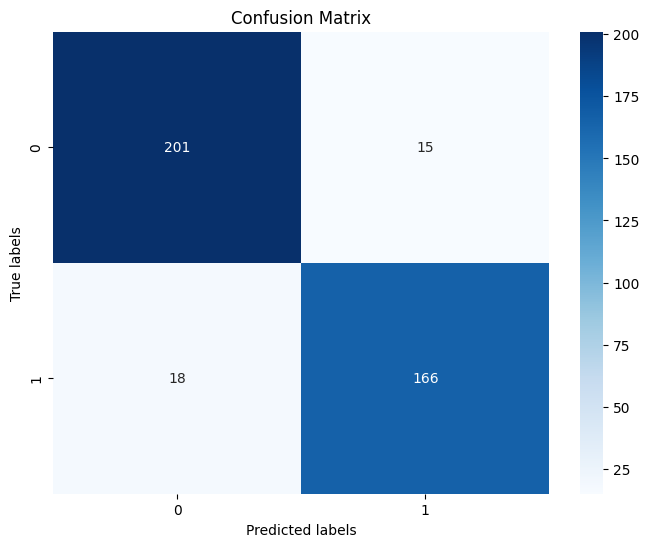

In [ ]:
# Predict probabilities for test set
y_pred_probs = cnn_model.predict(X_test)

# Round probabilities to obtain predicted classes
y_pred = np.round(y_pred_probs).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



Epoch 1/10
13/13 [==============================] - 2s 156ms/step - loss: 0.0185 - accuracy: 0.9850 - val_loss: 0.3896 - val_accuracy: 0.9175
Epoch 2/10
13/13 [==============================] - 2s 131ms/step - loss: 0.0199 - accuracy: 0.9856 - val_loss: 0.3973 - val_accuracy: 0.9150
Epoch 3/10
13/13 [==============================] - 2s 132ms/step - loss: 0.0177 - accuracy: 0.9900 - val_loss: 0.4120 - val_accuracy: 0.9150
Epoch 4/10
13/13 [==============================] - 2s 136ms/step - loss: 0.0173 - accuracy: 0.9894 - val_loss: 0.4221 - val_accuracy: 0.9175
Epoch 5/10
13/13 [==============================] - 2s 121ms/step - loss: 0.0172 - accuracy: 0.9906 - val_loss: 0.4360 - val_accuracy: 0.9200
Epoch 6/10
13/13 [==============================] - 2s 124ms/step - loss: 0.0164 - accuracy: 0.9906 - val_loss: 0.4473 - val_accuracy: 0.9150
Epoch 7/10
13/13 [==============================] - 2s 124ms/step - loss: 0.0164 - accuracy: 0.9900 - val_loss: 0.4546 - val_accuracy: 0.9175
Epoch 

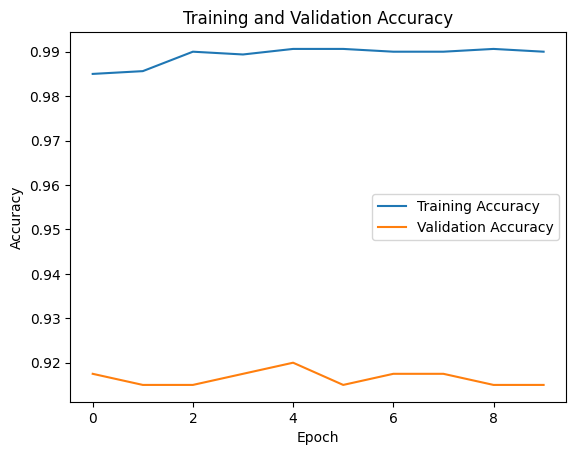

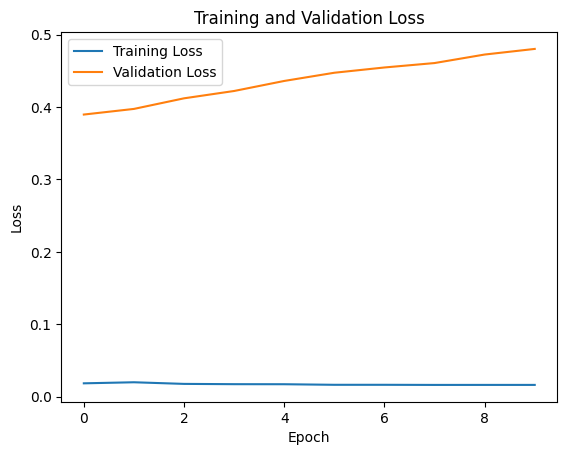

In [ ]:
# Train the model and record training history
history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Predict probabilities for test set
y_pred_probs = cnn_model.predict(X_test)

# Round probabilities to obtain predicted classes
y_pred = np.round(y_pred_probs).astype(int)

# Generate classification report
print(classification_report(y_test, y_pred))


13/13 [==============================] - 9s 637ms/step
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       216
           1       0.90      0.91      0.91       184

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_probs)
print("ROC AUC:", roc_auc)


Accuracy: 0.9125
Precision: 0.8983957219251337
Recall: 0.9130434782608695
F1-score: 0.9056603773584905
ROC AUC: 0.9716686795491143


In [ ]:
from keras.models import load_model
import numpy as np

# Load the saved model
loaded_model = load_model('sentiment_analysis_model.h5')

# Assuming you have new data in the variable new_data
new_data = ["Your new text data goes here", "Another new text data example"]

# Perform TF-IDF transformation on the new data
new_data_tfidf = vectorizer.transform(new_data)

# Reshape the input data for CNN
new_data_tfidf_reshaped = np.reshape(new_data_tfidf.toarray(), (new_data_tfidf.shape[0], new_data_tfidf.shape[1], 1))

# Make predictions on the new data
predictions = loaded_model.predict(new_data_tfidf_reshaped)

# Assuming predictions are probabilities, you can round them to get the predicted classes
predicted_classes = np.round(predictions).astype(int)

# Display the predicted classes
print(predicted_classes)


1/1 [==============================] - 1s 663ms/step
[[1]
 [1]]


In [ ]:
# Define a function to map sentiment predictions to emojis
def map_sentiment_to_emoji(sentiment):
    if sentiment == 1:
        return "😊"  # Positive sentiment emoji
    else:
        return "😞"  # Negative sentiment emoji

# Assuming you have text samples in the variable text_samples
text_samples = ["I love this product, it's amazing!",
                "I'm not satisfied with the service provided."]

# Perform TF-IDF transformation on the text samples
text_samples_tfidf = vectorizer.transform(text_samples)

# Reshape the input data for CNN
text_samples_tfidf_reshaped = np.reshape(text_samples_tfidf.toarray(), (text_samples_tfidf.shape[0], text_samples_tfidf.shape[1], 1))

# Make predictions on the text samples
predictions = loaded_model.predict(text_samples_tfidf_reshaped)

# Assuming predictions are probabilities, round them to get the predicted classes
predicted_classes = np.round(predictions).astype(int)

# Display the predicted sentiment and corresponding emojis for each text sample
for text, sentiment in zip(text_samples, predicted_classes):
    emoji = map_sentiment_to_emoji(sentiment[0])
    print(f"Text: {text} | Predicted Sentiment: {'Positive' if sentiment[0] == 1 else 'Negative'} | Emoji: {emoji}")


1/1 [==============================] - 0s 62ms/step
Text: I love this product, it's amazing! | Predicted Sentiment: Positive | Emoji: 😊
Text: I'm not satisfied with the service provided. | Predicted Sentiment: Positive | Emoji: 😊


In [ ]:
# Define a function to remove emojis from text
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Define a function to predict sentiment
def predict_sentiment(text):
    # Remove emojis from text
    text = remove_emojis(text)
    # Perform TF-IDF transformation on the text
    text_tfidf = vectorizer.transform([text])
    # Reshape the input data for CNN
    text_tfidf_reshaped = np.reshape(text_tfidf.toarray(), (text_tfidf.shape[0], text_tfidf.shape[1], 1))
    # Make predictions on the text
    prediction = loaded_model.predict(text_tfidf_reshaped)
    return prediction[0][0]

# Test the function with example text containing emojis
text_with_emojis = "I'm fed up with all these problems. 😤"
sentiment = predict_sentiment(text_with_emojis)
print(f"Text: {text_with_emojis} | Predicted Sentiment: {'Positive' if sentiment > 0.9 else 'Negative'}")

1/1 [==============================] - 0s 118ms/step
Text: I'm fed up with all these problems. 😤 | Predicted Sentiment: Negative


In [ ]:
samples = [
    "I hate waiting in long queues. 😠",
    "The customer service was terrible. 😡",
    "I'm so disappointed with the quality of this product. 😞",
    "This movie was awful. 😣",
    "The food at the restaurant was disgusting. 🤢",
    "I'm fed up with all these problems. 😤",
    "I'm so frustrated with the slow internet speed. 😩",
    "I'm so excited! 😃 This product is amazing! 🎉",
    "I love this product! 😍",
    "The service was excellent! 😊",
    "This movie was amazing! 🎬",
    "The food at the restaurant was delicious! 🍕",
    "I'm so happy with my purchase! 😀",
    "The vacation was fantastic! 🌴",
    "I'm thrilled with the new features! 🚀"

]

# Test the predict_sentiment function with negative samples
for sample in samples:
    sentiment = predict_sentiment(sample)
    print(f"Text: {sample} | Predicted Sentiment: {'Positive' if sentiment > 0.5 else 'Negative'}")


1/1 [==============================] - 0s 89ms/step
Text: I hate waiting in long queues. 😠 | Predicted Sentiment: Negative
1/1 [==============================] - 0s 156ms/step
Text: The customer service was terrible. 😡 | Predicted Sentiment: Positive
1/1 [==============================] - 0s 95ms/step
Text: I'm so disappointed with the quality of this product. 😞 | Predicted Sentiment: Positive
1/1 [==============================] - 0s 26ms/step
Text: This movie was awful. 😣 | Predicted Sentiment: Positive
1/1 [==============================] - 0s 25ms/step
Text: The food at the restaurant was disgusting. 🤢 | Predicted Sentiment: Negative
1/1 [==============================] - 0s 25ms/step
Text: I'm fed up with all these problems. 😤 | Predicted Sentiment: Positive
1/1 [==============================] - 0s 26ms/step
Text: I'm so frustrated with the slow internet speed. 😩 | Predicted Sentiment: Positive
1/1 [==============================] - 0s 26ms/step
Text: I'm so excited! 😃 This produ